# Jupyter Notebook

AIRPORT

# Ejercicio 1.0

In [ ]:
#/home/dsc/Data/challenge/searches.csv.bz2
#/home/dsc/Data/challenge/bookings.csv.bz2

import dask.dataframe as dd

filename = '/home/dsc/Data/challenge/searches.csv'
df = dd.read_csv(filename, dtype='str')

In [84]:
!bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | head -300000  > bookings_sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/bookings.csv.bz2, output file = (stdout)


In [85]:
!bzip2 -f bookings_sample.csv

In [14]:
ls -l

total 540
-rw-rw-r-- 1 dsc dsc   5051 nov 20 17:40 AIRPORT.ipynb
-rw-rw-r-- 1 dsc dsc 535893 nov 20 17:38 bookings_sample.csv.bz2
drwxrwxr-x 2 dsc dsc   4096 nov 18 19:40 input/
-rw-rw-r-- 1 dsc dsc      0 nov 18 19:45 readme2.md
-rw-rw-r-- 1 dsc dsc     37 nov 18 19:37 README.md


In [ ]:
! bzcat bookings_sample.csv.bz2 | wc -l

In [3]:
import bz2 
import pandas as pd


In [21]:
fileBz2 = bz2.BZ2File('./bookings_sample.csv.bz2')
k =0
for line in fileBz2:
    k+=1
print(k)

10000


In [22]:
fileBz2.closed


False

In [24]:
#de esta manera no habría que cerrar el fichero. 
with bz2.BZ2File('./bookings_sample.csv.bz2') as fileBZ2:
    k=0
    for line in fileBZ2:
        k+=1
print(k)

10000


In [34]:
import bz2
import csv

def bz2_csv_rows(fp):
    with bz2.open(fp, mode='rt', newline='') as bzfp:
        for row in csv.reader(bzfp):
            yield row

In [26]:
booking_sanple = bz2_csv_rows('./bookings_sample.csv.bz2')

In [41]:
import pandas as pd

booking_csv = pd.read_csv('./bookings_sample.csv.bz2',compression = 'bz2',  sep='^')

In [45]:
booking_csv.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [77]:
booking_csv.groupby('arr_city').agg({"pax": "sum"}).sort_values('pax', ascending = False)

,pax
arr_city,
NYC,233
WAS,186
HKG,112
CHI,102
LON,96
...,...
MAO,-6
PSA,-8
DPS,-9


In [55]:
booking_csv.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [70]:
airports_iso = pd.read_json('https://raw.githubusercontent.com/mwgg/Airports/master/airports.json')

In [71]:
airports_iso = airports_iso.T

In [78]:
airports_iso.columns

Index(['icao', 'iata', 'name', 'city', 'state', 'country', 'elevation', 'lat',
       'lon', 'tz'],
      dtype='object')

In [82]:
iso_col= ['icao','name']
airports_iso_col = airports_iso[iso_col]

In [89]:
chunk_size=100000
booking_csv = pd.read_csv('./bookings_sample.csv.bz2',compression = 'bz2',  sep='^', iterator=True)
chunks = []

loop = True
while loop:
    try:
        chunk = booking_csv.get_chunk(chunk_size)[["arr_city", "pax"]].groupby('arr_city').agg({"pax": "sum"})
        chunks.append(chunk)
    except StopIteration:
        loop = False
        print("Iteration is stopped")

df_ac = pd.concat(chunks, ignore_index=True)
    

Iteration is stopped


In [4]:
chunk_size=100000
reader = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2',chunksize = chunk_size, compression = 'bz2',  sep='^', iterator=True)
chunks = []

k = 0
for df in reader:
    df = df.dropna()
    chunks.append(df.groupby('arr_port').agg({"pax": "sum"}))
    k+=1
    print(k)
    
pd.concat(chunks).groupby('arr_port').agg({"pax": "sum"}).sort_values('pax', ascending = False)
airpots_union = pd.concat(chunks)
airpots_union = airpots_union.dropna()
airpots_top10 = airpots_union.groupby('arr_port').agg({"pax": "sum"}).sort_values('pax', ascending = False)[:10]
airpots_top10.to_csv('02_top10.csv')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


In [121]:
ls -l

total 17000
-rw-rw-r-- 1 dsc dsc      185 nov 20 20:23 02_top10
-rw-rw-r-- 1 dsc dsc      185 nov 20 20:23 02_top10.csv
-rw-rw-r-- 1 dsc dsc   409725 oct 27 13:33 03-introduction_to_pandas.inclass.ipynb
-rw-rw-r-- 1 dsc dsc   237173 nov  6 13:22 04-advanced_pandas.empty.ipynb
-rw-rw-r-- 1 dsc dsc   167838 nov 11 19:05 A04-advanced_pandas.inclass.ipynb
-rw-rw-r-- 1 dsc dsc    74425 nov 20 20:21 AIRPORT.ipynb
-rw-rw-r-- 1 dsc dsc 16468929 nov 20 18:59 bookings_sample.csv.bz2
drwxrwxr-x 2 dsc dsc     4096 nov 18 19:40 input/
-rw-rw-r-- 1 dsc dsc        0 nov 18 19:45 readme2.md
-rw-rw-r-- 1 dsc dsc       37 nov 18 19:37 README.md
-rw-rw-r-- 1 dsc dsc    24042 nov 19 13:24 Untitled.ipynb


In [67]:
chunk_size=100000
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',nrows = 300000,chunksize = chunk_size, compression = 'bz2',  sep='^', iterator=True)
chunks = []

k = 0
for df in reader:
    df = df.dropna()
    chunks.append(df)
    k+=1
    print(k)
    
searches_union = pd.concat(chunks)
searches_union.columns

1
2


/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3


Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [68]:
searches_union.head()
searches_union['Date'] = pd.to_datetime(searches_union['Date'])
searches_union['Mes'] = searches_union['Date'].dt.month
#searches_union['Destination'] = searches_union['Destination'].str.
#Destination
searches_union = searches_union[searches_union['Destination'].isin(['MAD','BCN'])]
#searches_union = searches_union.groupby(['Destination','Mes'])[['Destination']].count()
#esto es un grouby dataframe, un estilo diferentes de dataframe 

In [78]:
searches_union2 = searches_union.groupby(['Destination','Mes'])[['Destination']].count()
#superimportante el doble corchere en el group by !!!!!!!!!!

In [79]:
searches_union2


Destination
Destination Mes             
BCN         3              1
            6              2
            7              3
            8              2
MAD         2              1
            3              1
            4              2
            5              1
            6              1
            7              1
            9              2
            10             1

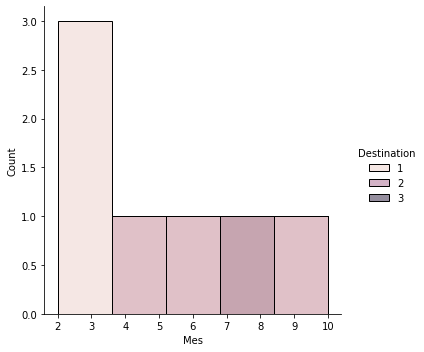

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=searches_union2,x='Mes',hue='Destination',legend=True)